In [45]:
import openai
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [28]:
%load_ext jupyter_ai_magics

The jupyter_ai_magics extension is already loaded. To reload it, use:
  %reload_ext jupyter_ai_magics


In [4]:
%ai help

Usage: %%ai [OPTIONS] MODEL_ID

  Invokes a language model identified by MODEL_ID, with the prompt being
  contained in all lines after the first. Both local model IDs and global
  model IDs (with the provider ID explicitly prefixed, followed by a colon)
  are accepted.

  To view available language models, please run `%ai list`.

Options:
  -f, --format [code|html|image|json|markdown|math|md|text]
                                  IPython display to use when rendering
                                  output. [default="markdown"]
  -n, --region-name TEXT          AWS region name, e.g. 'us-east-1'. Required
                                  for SageMaker provider; does nothing with
                                  other providers.
  -q, --request-schema TEXT       The JSON object the endpoint expects, with
                                  the prompt being substituted into any value
                                  that matches the string literal '<prompt>'.
                         

In [5]:
%ai list --help

Usage: %ai list [OPTIONS] [PROVIDER_ID]

  List language models, optionally scoped to PROVIDER_ID.

Options:
  --help  Show this message and exit.


In [29]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`ai21:j1-large`</li><li>`ai21:j1-grande`</li><li>`ai21:j1-jumbo`</li><li>`ai21:j1-grande-instruct`</li><li>`ai21:j2-large`</li><li>`ai21:j2-grande`</li><li>`ai21:j2-jumbo`</li><li>`ai21:j2-grande-instruct`</li><li>`ai21:j2-jumbo-instruct`</li></ul> |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock:amazon.titan-text-express-v1`</li><li>`bedrock:ai21.j2-ultra-v1`</li><li>`bedrock:ai21.j2-mid-v1`</li><li>`bedrock:cohere.command-light-text-v14`</li><li>`bedrock:cohere.command-text-v14`</li><li>`bedrock:meta.llama2-13b-chat-v1`</li><li>`bedrock:meta.llama2-70b-chat-v1`</li></ul> |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock-chat:anthropic.claude-v2`</li><li>`bedrock-chat:anthropic.claude-v2:1`</li><li>`bedrock-chat:anthropic.claude-instant-v1`</li><li>`bedrock-chat:anthropic.claude-3-sonnet-20240229-v1:0`</li></ul> |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic:claude-v1`</li><li>`anthropic:claude-v1.0`</li><li>`anthropic:claude-v1.2`</li><li>`anthropic:claude-2`</li><li>`anthropic:claude-2.0`</li><li>`anthropic:claude-instant-v1`</li><li>`anthropic:claude-instant-v1.0`</li><li>`anthropic:claude-instant-v1.2`</li></ul> |
| `anthropic-chat` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic-chat:claude-2.0`</li><li>`anthropic-chat:claude-2.1`</li><li>`anthropic-chat:claude-instant-1.2`</li><li>`anthropic-chat:claude-3-opus-20240229`</li><li>`anthropic-chat:claude-3-sonnet-20240229`</li></ul> |
| `azure-chat-openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`cohere:command`</li><li>`cohere:command-nightly`</li><li>`cohere:command-light`</li><li>`cohere:command-light-nightly`</li></ul> |
| `gemini` | `GOOGLE_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`gemini:gemini-1.0-pro`</li><li>`gemini:gemini-1.0-pro-001`</li><li>`gemini:gemini-1.0-pro-latest`</li><li>`gemini:gemini-1.0-pro-vision-latest`</li><li>`gemini:gemini-pro`</li><li>`gemini:gemini-pro-vision`</li></ul> |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`gpt4all:ggml-gpt4all-j-v1.2-jazzy`</li><li>`gpt4all:ggml-gpt4all-j-v1.3-groovy`</li><li>`gpt4all:ggml-gpt4all-l13b-snoozy`</li><li>`gpt4all:mistral-7b-openorca.Q4_0`</li><li>`gpt4all:mistral-7b-instruct-v0.1.Q4_0`</li><li>`gpt4all:gpt4all-falcon-q4_0`</li><li>`gpt4all:wizardlm-13b-v1.2.Q4_0`</li><li>`gpt4all:nous-hermes-llama2-13b.Q4_0`</li><li>`gpt4all:gpt4all-13b-snoozy-q4_0`</li><li>`gpt4all:mpt-7b-chat-merges-q4_0`</li><li>`gpt4all:orca-mini-3b-gguf2-q4_0`</li><li>`gpt4all:starcoder-q4_0`</li><li>`gpt4all:rift-coder-v0-7b-q4_0`</li><li>`gpt4all:em_german_mistral_v01.Q4_0`</li></ul> |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai:babbage-002`</li><li>`openai:davinci-002`</li><li>`openai:gpt-3.5-turbo-instruct`</li></ul> |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai-chat:gpt-3.5-turbo`</li><li>`openai-chat:gpt-3.5-turbo-0125`</li><li>`openai-chat:gpt-3.5-turbo-0301`</li><li>`openai-chat:gpt-3.5-turbo-0613`</li><li>`openai-chat:gpt-3.5-turbo-1106`</li><li>`openai-chat:gpt-3.5-turbo-16k`</li><li>`openai-chat:gpt-3.5-turbo-16k-0613`</li><li>`openai-chat:gpt-4`</li><li>`openai-chat:gpt-4-turbo-preview`</li><li>`openai-chat:gpt-4-0613`</li><li>`openai-chat:gpt-4-32k`</li><li>`openai-chat:gpt-4-32k-0613`</li><li>`openai-chat:gpt-4-0125-preview`</li><li>`openai-chat:gpt-4-1106-preview`</li></ul> |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | <ul><li>`qianfan:ERNIE-Bot`</li><li>`qianfan:ERNIE-Bot-4`</li></ul> |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deployment.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |
| `togetherai` | `TOGETHER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`togetherai:Austism/chronos-hermes-13b`</li><li>`togetherai:DiscoResearch/DiscoLM-mixtral-8x7b-v2`</li><li>`togetherai:EleutherAI/llemma_7b`</li><li>`togetherai:Gryphe/MythoMax-L2-13b`</li><li>`togetherai:Meta-Llama/Llama-Guard-7b`</li><li>`togetherai:Nexusflow/NexusRaven-V2-13B`</li><li>`togetherai:NousResearch/Nous-Capybara-7B-V1p9`</li><li>`togetherai:NousResearch/Nous-Hermes-2-Yi-34B`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-13b`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-70b`</li></ul> |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:davinci-002` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |


In [30]:
%%ai openai-chat:gpt-3.5-turbo
lists vs. tuples vs. sets in Python

## Lists vs. Tuples vs. Sets in Python

### Lists:
- Ordered collection of items
- Mutable (can be changed)
- Elements can be accessed using index
- Can contain duplicate elements
- Defined using square brackets []

### Tuples:
- Ordered collection of items
- Immutable (cannot be changed)
- Elements can be accessed using index
- Can contain duplicate elements
- Defined using parentheses ()

### Sets:
- Unordered collection of unique items
- Mutable (can be changed)
- Elements cannot be accessed using index
- Does not allow duplicate elements
- Defined using curly braces {}

In Python, lists are commonly used when you need a collection of items that can be changed, tuples are used for fixed collections that should not change, and sets are used when you need a collection of unique items with no specific order.

In [31]:
%%ai chatgpt
how to sort lists in Python?

To sort a list in Python, you can use the `sorted()` function or the `sort()` method.

Here is an example using the `sorted()` function:

```python
my_list = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]
sorted_list = sorted(my_list)
print(sorted_list)
```

Output:
```
[1, 1, 2, 3, 3, 4, 5, 5, 5, 6, 9]
```

And here is an example using the `sort()` method:

```python
my_list = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]
my_list.sort()
print(my_list)
```

Output:
```
[1, 1, 2, 3, 3, 4, 5, 5, 5, 6, 9]
```

In [32]:
%%ai chatgpt
explain dict.update()

The `dict.update()` method is used to update the key-value pairs in a dictionary by adding items from another dictionary or an iterable of key-value pairs. If a key already exists in the dictionary being updated, its value is replaced with the new value from the other dictionary. If a key does not exist, it is added to the dictionary.

Example:

```python
# Define two dictionaries
dict1 = {'a': 1, 'b': 2}
dict2 = {'b': 3, 'c': 4}

# Update dict1 with dict2
dict1.update(dict2)

print(dict1)  # Output: {'a': 1, 'b': 3, 'c': 4}
```

In [33]:
%%ai chatgpt -f math
Generate the 2D heat quation in LaTex surrounded by `$$`. Do not include an explanation

<IPython.core.display.Math object>

In [41]:
%%ai chatgpt -f code
Define a function that calculates the factorial.
Call the function with 10 as an argument.

In [ ]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

factorial(10)

In [43]:
x = [n**2 for n in range(10)]
x

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [38]:
%%ai chatgpt
please explain this code: {In[36]}

```python
# This code creates a list 'x' containing the squares of numbers from 0 to 9 using list comprehension
x = [n**2 for n in range(10)]
x
```

In [44]:
pip install huggingface_hub

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.4/346.4 kB 377.1 kB/s eta 0:00:001m355.1 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


/Users/taiwosokunbi/Library/Python/3.9/lib/python/site-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'InferenceApi' (from 'huggingface_hub.inference_api') is deprecated and will be removed from version '1.0'. `InferenceApi` client is deprecated in favor of the more feature-complete `InferenceClient`. Check out this guide to learn how to convert your script to use it: https://huggingface.co/docs/huggingface_hub/guides/inference#legacy-inferenceapi-client.
  warnings.warn(warning_message, FutureWarning)


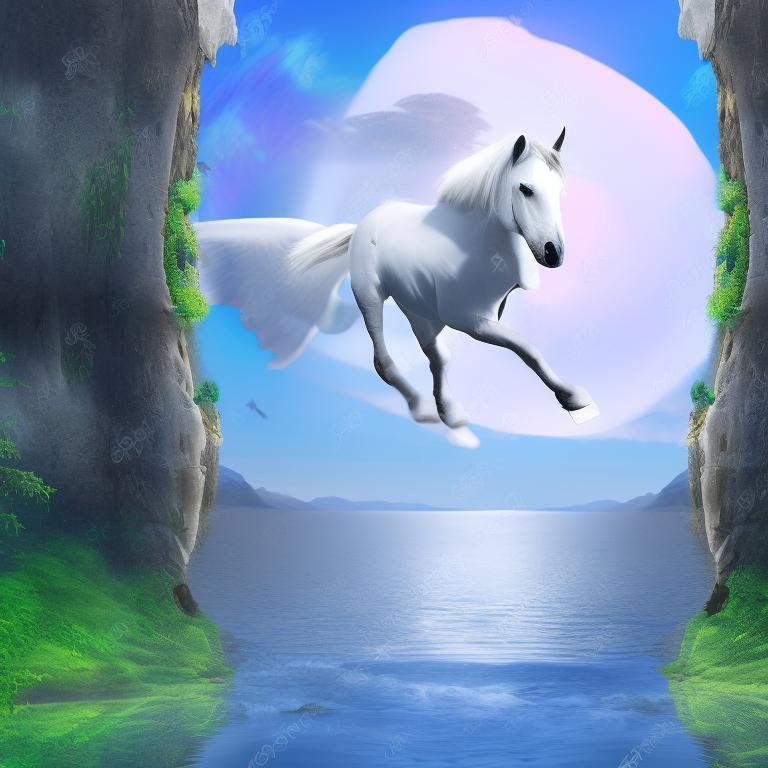

In [50]:
%%ai huggingface_hub:stabilityai/stable-diffusion-2-1 -f image
Create an utopia flying unicorn, white moon backgroung and a magical river